In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.optimize import curve_fit

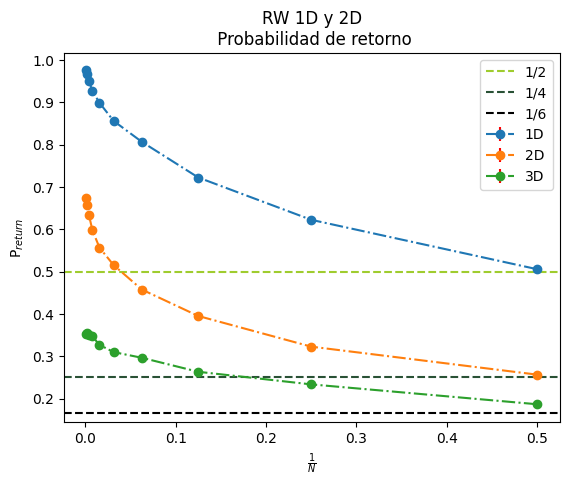

In [13]:
df1 = pd.read_csv("Datos/caminante_1d.csv")
df2 = pd.read_csv("Datos/caminante_2d.csv")
df3 = pd.read_csv("Datos/caminante_3d.csv")

plt.errorbar(1/df1['n_max'],df1['prob'],yerr=df1["error"],marker="o",ls="-.",ecolor="red",label="1D")
plt.errorbar(1/df2['n_max'],df2['prob'],yerr=df2["error"],marker="o",ls="-.",ecolor="red",label="2D")
plt.errorbar(1/df3['n_max'],df3['prob'],yerr=df3["error"],marker="o",ls="-.",ecolor="red",label="3D")

plt.axhline(1/2,ls="--",color="#9FCC2E",label="1/2")
plt.axhline(1/4,ls="--",color="#295135",label="1/4")
plt.axhline(1/6,ls="--",color="#000000",label="1/6")

plt.title("RW 1D y 2D\n Probabilidad de retorno")
plt.xlabel('$\\frac{1}{N}$')
#plt.xscale("log")
plt.ylabel('P$_{return}$')
plt.legend()
plt.show()

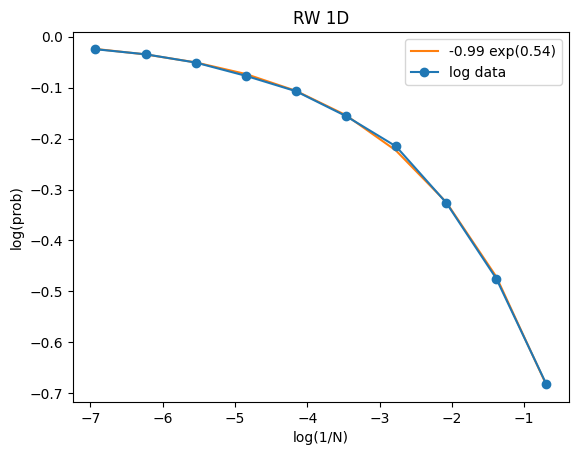

In [53]:
x = 1/df1["n_max"]
y = df1["prob"]

x_log=np.log(x)
y_log=np.log(y)

def model(x,a,b):
     return a*np.exp(b*x)

params, covariance = curve_fit(model, x_log, y_log)

# Parámetros ajustados
a, b = params

ec_str=f"{a:.2f} exp({b:.2f})"
plt.errorbar(x_log,y_log,marker="o",label="log data")
plt.plot(x_log,model(x_log,a,b),label=ec_str)
#plt.scatter(x,y,label="data")
plt.title("RW 1D")
plt.xlabel("log(1/N)")
plt.ylabel("log(prob)")
plt.legend()
plt.show()

La ecuación de ajuste es $\hat{y}=-0.99e^{0.54\hat{x}}$  con $\hat{y}=\log(y)$ y $\hat{x}=\log(x)$



$\log(y) = -0.99e^{0.54\log(x)}$

$\Rightarrow y = \exp(-0.99e^{0.54\log(x)})$

$\Rightarrow y = \exp(-0.99e^{\log(x^{0.54})})$

$\Rightarrow y = e^{-0.99x^{0.54}}$


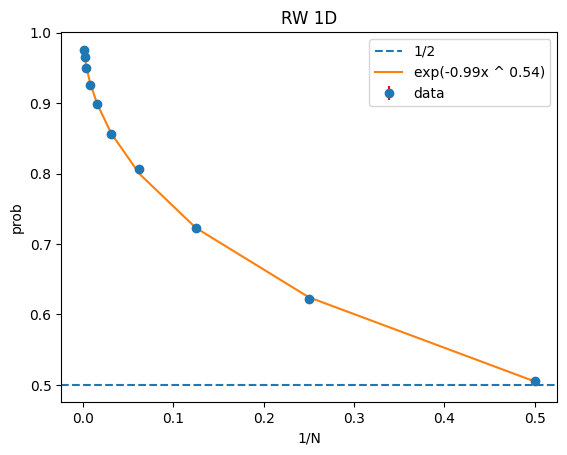

a: -0.991590172793212, b: 0.537245401997063


In [93]:
x = 1/df1["n_max"]
y = df1["prob"]
y_err=df1["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b):
     return np.exp(a*x**b)

params, covariance = curve_fit(model, x, y)

# Parámetros ajustados
a, b = params

ec_str=f"exp({a:.2f}x ^ {b:.2f})"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")
plt.axhline(1/2,ls="--",label="1/2")
plt.plot(x,model(x,a,b),label=ec_str)
plt.title("RW 1D")
plt.xlabel("1/N")
plt.ylabel("prob")
plt.legend()
plt.show()
print(f"a: {a:.15f}, b: {b:.15f}")

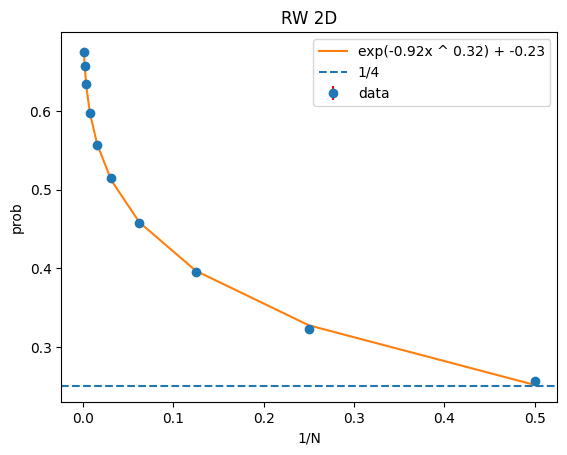

a: -0.921064130628686, b: 0.320520562908963, c: -0.226383063606657


In [92]:
x = 1/df2["n_max"]
y = df2["prob"]
y_err=df2["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b,c):
     return np.exp(a*x**b)+c

params, covariance = curve_fit(model, x, y)

# Parámetros ajustados
a, b, c = params

ec_str=f"exp({a:.2f}x ^ {b:.2f}) + {c:.2f}"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")
plt.plot(x,model(x,a,b,c),label=ec_str)
plt.axhline(1/4,ls="--",label="1/4")
plt.title("RW 2D")
plt.xlabel("1/N")
plt.ylabel("prob")
#plt.ylim((0.45,1))
plt.legend()
plt.show()

print(f"a: {a:.15f}, b: {b:.15f}, c: {c:.15f}")

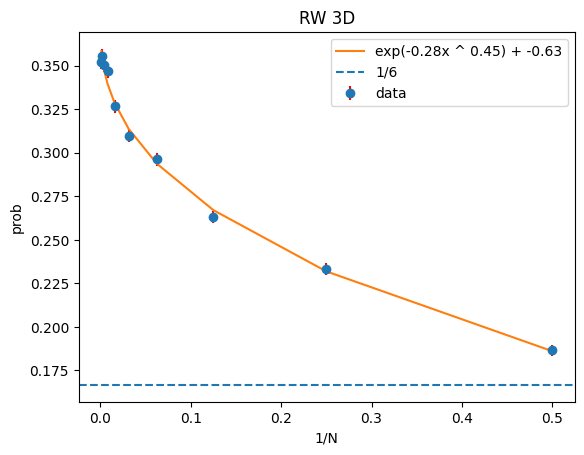

a: -0.278692718323464, b: 0.449901017184557, c: -0.629371342585372


In [95]:
x = 1/df3["n_max"]
y = df3["prob"]
y_err=df3["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b,c):
     return np.exp(a*x**b)+c

params, covariance = curve_fit(model, x, y)

# Parámetros ajustados
a, b, c = params

ec_str=f"exp({a:.2f}x ^ {b:.2f}) + {c:.2f}"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")
plt.plot(x,model(x,a,b,c),label=ec_str)
plt.axhline(1/6,ls="--",label="1/6")
plt.title("RW 3D")
plt.xlabel("1/N")
plt.ylabel("prob")
plt.legend()
plt.show()

print(f"a: {a:.15f}, b: {b:.15f}, c: {c:.15f}")